In [1]:
import glob
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

from math import sqrt

In [2]:
df = pd.read_csv("data_1000keV_local.csv")

Para estar en igualdad de condiciones que con los datos de degrad, vamos a escoger solo los 10 primeros eventos. Para ello hacemos un filtro.

In [3]:
mask = df.event_number < 1
df   = df[mask]

In [4]:
df

,event_number,track_id,step_number,x,y,z,ux,uy,uz,angle,step_length,track_length,E_kin,E_dep
0,0,1,0,0.000,0.000,0.000,-0.933,0.297,0.203,0.000,0.000,0.000,1000.000,0.000
1,0,1,1,-0.044,0.014,0.010,-0.939,0.287,0.191,0.958,0.047,0.047,999.639,0.361
2,0,1,2,-0.806,0.247,0.165,-0.841,0.015,0.542,26.013,0.827,0.875,994.527,1.495
3,0,1,3,-1.627,0.262,0.694,-0.834,0.087,0.545,23.871,1.000,1.875,987.515,7.012
4,0,1,4,-2.441,0.347,1.227,-0.773,0.120,0.622,27.899,1.000,2.875,983.367,4.148
5,0,1,5,-3.197,0.465,1.834,-0.721,0.091,0.687,32.964,1.000,3.875,979.813,3.554
6,0,1,6,-3.900,0.553,2.505,-0.754,0.027,0.656,32.317,1.000,4.875,976.273,3.539
7,0,1,7,-4.637,0.579,3.146,-0.793,0.293,0.535,20.736,1.000,5.875,963.070,13.203
8,0,1,8,-5.411,0.865,3.667,-0.439,0.619,0.651,43.427,1.000,6.875,955.236,7.834
9,0,1,9,-5.839,1.469,4.302,-0.443,0.523,0.728,44.213,1.000,7.875,953.646,1.590


We create another dataframe for the max and min distances.

               xdist   ydist   zdist       diag
event_number                                   
0             12.643  19.518  29.906  37.883593


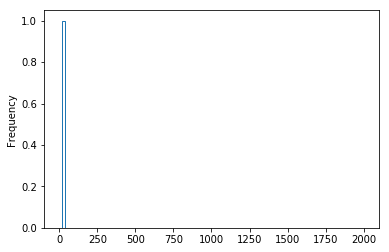

In [5]:
dist = pd.DataFrame({'xdist': df.groupby('event_number').x.max() - df.groupby('event_number').x.min(), 
                     'ydist': df.groupby('event_number').y.max() - df.groupby('event_number').y.min(), 
                     'zdist': df.groupby('event_number').z.max() - df.groupby('event_number').z.min()})
def diagonal(row):
    return sqrt(row['xdist']**2 + row['ydist']**2 + row['zdist']**2)
dist['diag'] = dist.apply(diagonal, axis=1)
dist['diag'].plot.hist(range=(0.,2000.), bins=100, histtype='step')
#fig = ax.get_figure()
#fig.savefig('diagonal.pdf')
print(dist)

In [6]:
from invisible_cities.evm.event_model import BHit
from invisible_cities.reco import paolina_functions as plf

In [7]:
trk_lengths = []
df_one = df[df.event_number == 0]
hit_list = [BHit(row.x, row.y, row.z, 1.) for indx, row in df_one.iterrows()]
voxels = plf.voxelize_hits(hit_list, np.array((1., 1., 1.)))
tracks = plf.make_track_graphs(voxels)
#plf.length(tracks)

In [9]:
tracks[0].nodes

NodeView((Voxel(-11.31873076923354, -16.08105000000285, 26.416966666668962, E=1.0), Voxel(-11.31873076923354, -15.105150000002551, 25.420100000002098, E=1.0), Voxel(-11.31873076923354, -14.129250000002251, 24.423233333335233, E=2.0), Voxel(-11.31873076923354, -13.15335000000195, 22.429500000001497, E=1.0), Voxel(-11.31873076923354, -13.15335000000195, 23.426366666668365, E=1.0), Voxel(-10.346192307694615, -16.08105000000285, 26.416966666668962, E=1.0), Voxel(-10.346192307694615, -16.08105000000285, 27.41383333333583, E=1.0), Voxel(-10.346192307694615, -16.08105000000285, 28.4107000000027, E=1.0), Voxel(-10.346192307694615, -14.129250000002251, 13.457699999999697, E=1.0), Voxel(-10.346192307694615, -14.129250000002251, 14.454566666666565, E=1.0), Voxel(-10.346192307694615, -14.129250000002251, 15.45143333333343, E=1.0), Voxel(-10.346192307694615, -13.15335000000195, 16.448300000000298, E=1.0), Voxel(-10.346192307694615, -13.15335000000195, 17.445166666667166, E=1.0), Voxel(-10.346192307

In [11]:
len(tracks[0])

117

In [13]:
type(tracks[0])

networkx.classes.graph.Graph

In [9]:
all_lengths = []
for i in np.arange(len(tracks)):
    all_lengths.append(plf.length(tracks[i]))

In [10]:
trk_lengths.append(max(all_lengths))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

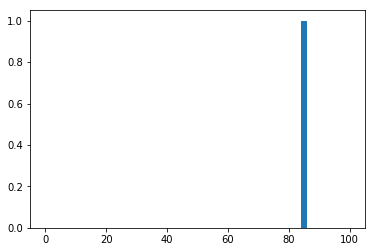

In [12]:
plt.hist(trk_lengths, range=(0,100), bins=50)

In [19]:
trk_lengths = []
for i in range(df.event_number.max()+1):
    df_one = df[df.event_number == i]
    hit_list = [BHit(row.x, row.y, row.z, 1.) for indx, row in df_one.iterrows()]
    voxels = plf.voxelize_hits(hit_list, np.array((1., 1., 1.)))
    tracks = plf.make_track_graphs(voxels)
    trk_lengths.append(plf.length(tracks[0]))

MemoryError: 

In [28]:
type(tracks[1])

IndexError: tuple index out of range

In [26]:
print(tracks[0])

In [29]:
trk_lengths = []
df_one = df[df.event_number == 2]
hit_list = [BHit(row.x, row.y, row.z, row.E_dep) for indx, row in df_one.iterrows()]
voxels = plf.voxelize_hits(hit_list, np.array((1., 1., 1.)))
tracks = plf.make_track_graphs(voxels)


In [35]:
print(len(tracks))
np.arange(len(tracks)+1)
print(len(tracks[0]))
print(tracks[0][1])

1
99


TypeError: 'Graph' object is not callable

In [10]:
for i in np.arange(len(tracks)):
    trk_lengths.append(plf.length(tracks[i]))

In [11]:
trk_lengths

[75.69661887339751]

In [12]:
plt.hist(plf.length(tracks), range=(0,20), bins=10)

AttributeError: 'tuple' object has no attribute 'is_multigraph'

In [6]:
df_one = df[df.event_number == 2]
hit_list = [BHit(row.x, row.y, row.z, 1.) for indx, row in df_one.iterrows()]
voxels = plf.voxelize_hits(hit_list, np.array((1., 1., 1.)))
tracks = plf.make_track_graphs(voxels)
plf.length(tracks[0])

0.0

In [7]:
len(tracks)

8

In [8]:
trk_lengths = []
for i in range(df.event_number.max()+1):
    df_one = df[df.event_number == i]
    hit_list = [BHit(row.x, row.y, row.z, 1.) for indx, row in df_one.iterrows()]
    voxels = plf.voxelize_hits(hit_list, np.array((1., 1., 1.)))
    tracks = plf.make_track_graphs(voxels)
    trk_lengths.append(plf.length(tracks[0]))

(array([13.,  5.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

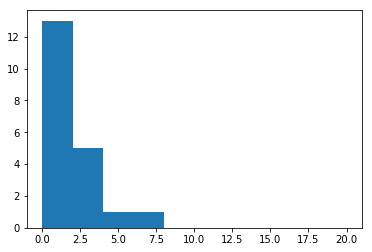

In [9]:
plt.hist(trk_lengths, range=(0,20), bins=10)

In [ ]:
len(trk_lengths)